# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

Alt. method to incorporate kaggle.json into colab

```
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
```
```
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/...gdrive link' 

```

To revert back to default configurations and not use gdrive

```
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
```



import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

100% 1.90M/1.90M [00:00<00:00, 2.78MB/s]
100% 1.90M/1.90M [00:00<00:00, 2.45MB/s]


In [ ]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [ ]:
# To Check Current Directory
!pwd

/content


In [ ]:
train_fname = 'data/train.tsv.zip'
test_fname = 'data/test.tsv.zip'
sub_fname = 'data/sampleSubmission.csv'

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [ ]:
import pandas as pd

In [ ]:
ls

data/        sample_data/                             Submission.csv
kaggle.json  sentiment-analysis-on-movie-reviews.zip


In [ ]:
raw_df = pd.read_csv(train_fname, sep='\t')

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
raw_df.Phrase.sample(10).values

array(['potentially enticing ingredients', 'sticking',
       "it 's hard to resist his pleas to spare wildlife and respect their environs",
       'coldest',
       'in an independent film of satiric fire and emotional turmoil',
       'subject', 'The performances are uniformly good .',
       'has such an irrepressible passion for sappy situations and dialogue',
       'to the Serbs themselves but also to a network of American right-wing extremists',
       'four scriptwriters'], dtype=object)

In [ ]:
test_df = pd.read_csv(test_fname, sep='\t')

In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
sub_df = pd.read_csv(sub_fname)

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [ ]:
raw_df.Sentiment.value_counts(normalize = True)

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

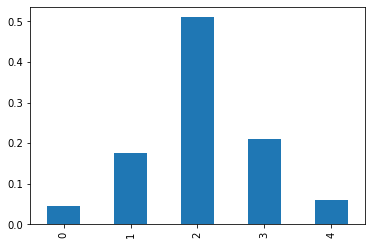

In [ ]:
raw_df.Sentiment.value_counts(normalize = True).sort_index().plot(kind = 'bar')

Tried balancing class weights as advised

In [ ]:
#LogisticRegression(raw_df.Sentiment,class_weight = 'balanced')

Summarize your insights and learnings from the dataset below:

* `???`
* `???`
* `???`

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

## see doc of tfidf, see parameter of tfidf when building a model

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
stemmer = SnowballStemmer(language='english')

In [ ]:
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text)]

In [ ]:
tokenize('Is this (the) really life, or is it; fantasy?')

['is',
 'this',
 '(',
 'the',
 ')',
 'realli',
 'life',
 ',',
 'or',
 'is',
 'it',
 ';',
 'fantasi',
 '?']

In [ ]:
def tokenize1(text):
  return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [ ]:
tokenize1('Is this (the) really life, or is it; fantasy?')

['is', 'this', 'the', 'realli', 'life', 'or', 'is', 'it', 'fantasi']

<h2>Create TfiDF Vectorizer</h2>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

import stopwords

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
english_stopwords = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Can also use nltk.download('stopwords')

In [ ]:
", ".join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
", ".join(english_stopwords[:120])

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only"

In [ ]:
selected_stopwords = english_stopwords[:115]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(tokenizer = tokenize1,
                             stop_words = selected_stopwords,
                             ngram_range = (1,2),
                             max_features = 2000)

more than one word in a particular sentence are known as nwords

In [ ]:
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize1 at 0x7fab865b0160>)

In [ ]:
len(vectorizer.vocabulary_)

2000

In [ ]:
vectorizer.get_feature_names_out()[:200]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'ani',
       'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around',
       'arriv', 'art'

Even though I was watching it live, I rewinded the live and he said that punctuations were removed because of how we define 'tokenizer' then I realised that earlier, I had created another tokenizer tokenize1.

I didn't fit it, therefore I fitted. Didn't deleted the above cell to show where I went wrong.

Certain bigrams are present, sometimes bigrams convey more meaning than it would do if it is individual.

<p>Convert inputs that we have from train test and test set</p>

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
inputs = vectorizer.transform(raw_df.Phrase)

In [ ]:
inputs.shape

(156060, 2000)

In [ ]:
inputs.toarray()[0][:200]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
inputs.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
test_inputs = vectorizer.transform(test_df.Phrase)

In [ ]:
test_inputs.shape

(66292, 2000)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
inputs

<156060x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 473102 stored elements in Compressed Sparse Row format>

In [ ]:
TRAIN_SIZE = 110_000

In [ ]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = raw_df.Sentiment[:TRAIN_SIZE]

In [ ]:
train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

In [ ]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = raw_df.Sentiment[TRAIN_SIZE:]

In [ ]:
val_inputs.shape, val_targets.shape

((46060, 2000), (46060,))

### Train Logistic Regression Model



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(train_inputs, train_targets)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
train_preds = model.predict(train_inputs)

In [ ]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

In [ ]:
train_preds

array([3, 2, 2, ..., 0, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.6381818181818182

In [ ]:
val_preds = model.predict(val_inputs)

In [ ]:
accuracy_score(val_targets, val_preds)

0.5795049934867564

### Study Predictions on Sample Inputs

In [ ]:
small_df = raw_df.sample(20)

In [ ]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
57888,57889,2918,a flop with the exception of about six gags th...,0
62002,62003,3135,slapstick sequences,3
6243,6244,248,I remember -RRB-,2
13007,13008,560,in luminous interviews and amazingly evocative...,4
105008,105009,5547,Suffers from a decided lack,1
16912,16913,733,more than a few,2
27257,27258,1253,walking around a foreign city,2
116106,116107,6188,-LRB- Lee -RRB- treats his audience the same w...,0
1713,1714,63,poorly,1
28597,28598,1321,this kind of movie,2


In [ ]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [ ]:
small_inputs.shape

(20, 2000)

In [ ]:
small_preds = model.predict(small_inputs)

In [ ]:
small_preds

array([1, 2, 2, 4, 1, 2, 2, 3, 1, 2, 2, 2, 2, 2, 1, 2, 2, 3, 4, 1])

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score 



In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
test_inputs

<66292x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 181514 stored elements in Compressed Sparse Row format>

In [ ]:
test_preds = model.predict(test_inputs)

In [ ]:
test_preds

array([3, 3, 2, ..., 2, 2, 1])

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


Replace Sentiment column with test_preds

In [ ]:
sub_df.Sentiment = test_preds

In [ ]:
sub_df.to_csv('Submission.csv', index = None)

In [ ]:
!head Submission.csv

PhraseId,Sentiment
156061,3
156062,3
156063,2
156064,3
156065,2
156066,3
156067,3
156068,2
156069,3


## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional: 
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips: 

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)


### Model 1: Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model1 = MultinomialNB()

In [ ]:
model1.fit(train_inputs, train_targets)

MultinomialNB()

In [ ]:
accuracy_score(train_targets, model1.predict(train_inputs))

0.5848363636363636

In [ ]:
model1_cp = MultinomialNB(class_prior = (0.05, 0.2, .5, 0.2, 0.05) )

In [ ]:
model1_cp.fit(train_inputs, train_targets)

MultinomialNB(class_prior=(0.05, 0.2, 0.5, 0.2, 0.05))

In [ ]:
accuracy_score(train_targets, model1_cp.predict(train_inputs))

0.5881636363636363

In [ ]:
accuracy_score(val_targets, model1_cp.predict(val_inputs))

0.5453755970473295

### Model 2: Hugging Face Transformer & DistilBERT Model for text classification/sentiment analysis

In [ ]:
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
    
Token: 
Add token as git credential? (Y/n) Y
Token is valid.
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper

Hugging Face successfully authenticated with token.

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Use pipeline method

Use pipelines from transformers library for text classification sentiment analysis to determine if the text is 'POSITIVE' or 'NEGATIVE'. DistilBERT-base-uncased-finetuned-sst-2-english model and revision af0f99b is used.

In [ ]:
from transformers import pipeline

In [ ]:
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


<h3>Important point </h3>To use pipeline function from Transformers library for Sentiment Analysis. It should be passed as a ' text input type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).'

In [ ]:
#RAW_DF

raw_df_phrase = list(raw_df.Phrase[:])

In [ ]:
len(raw_df_phrase)

156060

In [ ]:
list(raw_df.Phrase[:5])

['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
 'A series of escapades demonstrating the adage that what is good for the goose',
 'A series',
 'A',
 'series']

#### Using Pipeline Transformer with Sample text 

In [ ]:
sample_phrase = list(raw_df.Phrase.sample(10))

In [ ]:
sample_phrase

['Winds',
 "` dramedy '",
 'of abstract guilt',
 'just bad',
 'touching , raucously amusing',
 'to the climactic burst of violence',
 'expect from the guy-in-a-dress genre',
 'This is an exercise not in biography but in hero worship .',
 'Nothing can detract from the affection of that moral favorite',
 'of Justine']

In [ ]:
sample0 = classifier(sample_phrase)
sample0

[{'label': 'POSITIVE', 'score': 0.9934725761413574},
 {'label': 'POSITIVE', 'score': 0.9980655312538147},
 {'label': 'NEGATIVE', 'score': 0.9654962420463562},
 {'label': 'NEGATIVE', 'score': 0.9997870326042175},
 {'label': 'POSITIVE', 'score': 0.9998863935470581},
 {'label': 'NEGATIVE', 'score': 0.7157948613166809},
 {'label': 'NEGATIVE', 'score': 0.9992058873176575},
 {'label': 'POSITIVE', 'score': 0.9950280785560608},
 {'label': 'POSITIVE', 'score': 0.9992583394050598},
 {'label': 'POSITIVE', 'score': 0.9919095635414124}]

In [ ]:
sample0[1]['label']

'POSITIVE'

In [ ]:
#model2 = classifier(list(raw_df.Phrase))

Got timeout warning maybe I can use th above method in a different IDE, but for now, I'll comment and document it :)

bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

<h3> Tokenize the text</h3>

Load Datasets using this syntax: https://huggingface.co/docs/datasets/loading#local-and-remote-files

In [ ]:
from datasets import load_dataset

Map raw_df with prepocess_data function

In [ ]:
raw_df

In [ ]:
#dataset = map(preprocess_data, raw_df.Phrase)

In [ ]:
import torch

#### DistilBERT Model

Pytorch framework
link: https://huggingface.co/docs/transformers/v4.20.1/en/task_summary

<h2> Hugging Face Course:  Text Classification </h2>

<p>https://huggingface.co/docs/transformers/v4.20.1/en/tasks/sequence_classification</p>

<h3>TensorFlow framework</h3>

Presumably said to be faster than Pytorch. Therefore used TensorFlow instead of PyTorch from resources.

##### Preprocessing Step

In [ ]:
from transformers import AutoTokenizer

tokenizer_bert = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
def preprocess_function(input):
    return tokenizer_bert(input['Phrase'], truncation=True)

In [ ]:
#Train
raw_df_tokenized = raw_df.Phrase.map(preprocess_function)

#Test
test_df_tokenized = test_df.Phrase.map(preprocess_function)

In [ ]:
raw_df_tokenized[:5]

0    [input_ids, attention_mask]
1    [input_ids, attention_mask]
2    [input_ids, attention_mask]
3    [input_ids, attention_mask]
4    [input_ids, attention_mask]
Name: Phrase, dtype: object

In [ ]:
test_df_tokenized[:5]

0    [input_ids, attention_mask]
1    [input_ids, attention_mask]
2    [input_ids, attention_mask]
3    [input_ids, attention_mask]
4    [input_ids, attention_mask]
Name: Phrase, dtype: object

In [ ]:
raw_df_tokenized.head

<bound method NDFrame.head of 0         [input_ids, attention_mask]
1         [input_ids, attention_mask]
2         [input_ids, attention_mask]
3         [input_ids, attention_mask]
4         [input_ids, attention_mask]
                     ...             
156055    [input_ids, attention_mask]
156056    [input_ids, attention_mask]
156057    [input_ids, attention_mask]
156058    [input_ids, attention_mask]
156059    [input_ids, attention_mask]
Name: Phrase, Length: 156060, dtype: object>

In [ ]:
test_df_tokenized.head

<bound method NDFrame.head of 0        [input_ids, attention_mask]
1        [input_ids, attention_mask]
2        [input_ids, attention_mask]
3        [input_ids, attention_mask]
4        [input_ids, attention_mask]
                    ...             
66287    [input_ids, attention_mask]
66288    [input_ids, attention_mask]
66289    [input_ids, attention_mask]
66290    [input_ids, attention_mask]
66291    [input_ids, attention_mask]
Name: Phrase, Length: 66292, dtype: object>

Train by fine-tuning the BERT model in TensorFlow. To fine-tune a model in TensorFlow, start by converting your datasets to the tf.data.Dataset format with to_tf_dataset. Specify inputs and labels in columns, whether to shuffle the dataset order, batch size, and the data collator:

Previously had an error with converting to tf.data.Dataset format and this link gave instructions to upgrade(?) https://discuss.huggingface.co/t/dataset-object-has-no-attribute-to-tf-dataset/12099

In [ ]:
!pip install --upgrade transformers
!pip install --upgrade datasets

Didn't work, though. Still documenting it for later use.

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer_bert, return_tensors="tf")

MAJORLY helped in solving "AttributeError: 'Series' object has no attribute 'to_tf_dataset' site:stackoverflow.com" error.

link: https://stackoverflow.com/questions/73937384/attribute-error-datasetdict-object-has-no-attribute-to-tf-dataset

In [ ]:
from datasets import Dataset     
raw_df_tf = Dataset.from_pandas(raw_df)
test_df_tf = Dataset.from_pandas(test_df)

In [ ]:
raw_df_tf

Dataset({
    features: ['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'],
    num_rows: 156060
})

In [ ]:
raw_df_tf[:5]

{'PhraseId': [1, 2, 3, 4, 5],
 'SentenceId': [1, 1, 1, 1, 1],
 'Phrase': ['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
  'A series of escapades demonstrating the adage that what is good for the goose',
  'A series',
  'A',
  'series'],
 'Sentiment': [1, 2, 2, 2, 2]}

In [ ]:
test_df_tf

Dataset({
    features: ['PhraseId', 'SentenceId', 'Phrase'],
    num_rows: 66292
})

In [ ]:
test_df_tf[:5]

{'PhraseId': [156061, 156062, 156063, 156064, 156065],
 'SentenceId': [8545, 8545, 8545, 8545, 8545],
 'Phrase': ['An intermittently pleasing but mostly routine effort .',
  'An intermittently pleasing but mostly routine effort',
  'An',
  'intermittently pleasing but mostly routine effort',
  'intermittently pleasing but mostly routine']}

Since that method from StackOverflow helped in working, have to repeat the same process, such as, i.e., tokenization with 'raw_df_tf' and 'test_df_tf'. This shows how TensorFlow has problems with working with Pandas Dataframe, that makes a person to use(Eg.):
```
from datasets import Dataset 
tf_dataset = Dataset.from_pandas(dataframe)
```

Tokenized again to assimmulate with the newly created TensorFlow Dataset 

In [ ]:
def preprocess_function(input):
    return tokenizer_bert(input['Phrase'], truncation=True)

In [ ]:
#Train
raw_df_tf_tokenized = raw_df_tf.map(preprocess_function)

#Test
test_df_tf_tokenized = test_df_tf.map(preprocess_function)

  0%|          | 0/156060 [00:00<?, ?ex/s]

  0%|          | 0/66292 [00:00<?, ?ex/s]

In [ ]:
raw_df_tf_tokenized[:5]

{'PhraseId': [1, 2, 3, 4, 5],
 'SentenceId': [1, 1, 1, 1, 1],
 'Phrase': ['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
  'A series of escapades demonstrating the adage that what is good for the goose',
  'A series',
  'A',
  'series'],
 'Sentiment': [1, 2, 2, 2, 2],
 'input_ids': [[101,
   1037,
   2186,
   1997,
   9686,
   17695,
   18673,
   14313,
   1996,
   15262,
   3351,
   2008,
   2054,
   2003,
   2204,
   2005,
   1996,
   13020,
   2003,
   2036,
   2204,
   2005,
   1996,
   25957,
   4063,
   1010,
   2070,
   1997,
   2029,
   5681,
   2572,
   25581,
   2021,
   3904,
   1997,
   2029,
   8310,
   2000,
   2172,
   1997,
   1037,
   2466,
   1012,
   102],
  [101,
   1037,
   2186,
   1997,
   9686,
   17695,
   18673,
   14313,
   1996,
   15262,
   3351,
   2008,
   2054,
   2003,
   2204,
   2005,
   1996,
   13020,
   10

In [ ]:
test_df_tf_tokenized[:5]

{'PhraseId': [156061, 156062, 156063, 156064, 156065],
 'SentenceId': [8545, 8545, 8545, 8545, 8545],
 'Phrase': ['An intermittently pleasing but mostly routine effort .',
  'An intermittently pleasing but mostly routine effort',
  'An',
  'intermittently pleasing but mostly routine effort',
  'intermittently pleasing but mostly routine'],
 'input_ids': [[101,
   2019,
   23852,
   2135,
   24820,
   2021,
   3262,
   9410,
   3947,
   1012,
   102],
  [101, 2019, 23852, 2135, 24820, 2021, 3262, 9410, 3947, 102],
  [101, 2019, 102],
  [101, 23852, 2135, 24820, 2021, 3262, 9410, 3947, 102],
  [101, 23852, 2135, 24820, 2021, 3262, 9410, 102]],
 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
raw_df_tokenized[:5]

0    [input_ids, attention_mask]
1    [input_ids, attention_mask]
2    [input_ids, attention_mask]
3    [input_ids, attention_mask]
4    [input_ids, attention_mask]
Name: Phrase, dtype: object

In [ ]:
test_df_tokenized[:5]

0    [input_ids, attention_mask]
1    [input_ids, attention_mask]
2    [input_ids, attention_mask]
3    [input_ids, attention_mask]
4    [input_ids, attention_mask]
Name: Phrase, dtype: object

##### Training 

In [ ]:
tf_train_set = raw_df_tf_tokenized.to_tf_dataset(
    columns=["attention_mask", "input_ids"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_validation_set = test_df_tf_tokenized.to_tf_dataset(
    columns=["attention_mask", "input_ids"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

In [ ]:
tf_train_set

<PrefetchDataset element_spec={'input_ids': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}>

In [ ]:
tf_validation_set

<PrefetchDataset element_spec={'input_ids': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}>

Helpful Fine-tuning with Keras. As Keras in High-Level in TensorFlow.

Link: https://keras.io/guides/transfer_learning/

Create an optimizer function, learning rate schedule, and related training hyperparameters:

In [ ]:
from transformers import create_optimizer
import tensorflow as tf

batch_size = 16
num_epochs = 5

batches_per_epoch = len(raw_df_tf_tokenized) // batch_size
total_train_steps = int(batches_per_epoch * num_epochs)

optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps)

Load **DistilBERT** with _TFAutoModelForSequenceClassification_ with the number of expected labels:

In [ ]:
from transformers import TFAutoModelForSequenceClassification

model2 = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_transform', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_79', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

Configuring model2 for training with _compile_ function:

In [ ]:
import tensorflow as tf

model2.compile(optimizer=optimizer)

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


Fit to fine-tune model:

In [ ]:
model2.fit(x=tf_train_set, validation_data=list(tf_validation_set), epochs=3)

--Got an error PREVIOUSLY that the target should be a list therefore converted to list.

<h1>Fine-tuned a model for DOWNSTREAM tasks</h1>